(244, 2)


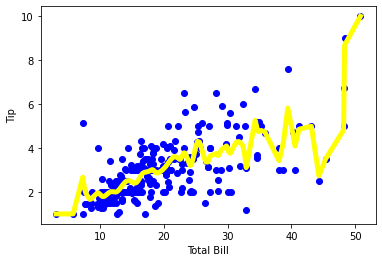

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gaussian kernel
def kernel(point, xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    
    for j in range(m):
        diff = point - X[j]
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * k**2))
    
    return weights

def localWeight(point, xmat, ymat, k):
    wt = kernel(point, xmat, k)
    W = (X.T * (wt*X)).I * (X.T * wt * ymat.T)
    return W

def localWeightRegression(xmat, ymat, k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    
    for i in range(m):
        ypred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)
        
    return ypred

data = pd.read_csv('tips.csv')
colA = np.array(data.total_bill)
colB = np.array(data.tip)

mcolA = np.mat(colA)
mcolB = np.mat(colB)

m = np.shape(mcolB)[1]
one = np.ones((1, m), dtype = int)

# horizontal stacking
X = np.hstack((one.T, mcolA.T))
print(X.shape)

ypred = localWeightRegression(X, mcolB, 0.5)

xsort = X.copy()
xsort.sort(axis=0)
plt.scatter(colA, colB, color='blue')
plt.plot(xsort[:, 1], ypred[X[:, 1].argsort(0)], color='yellow', linewidth=5)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

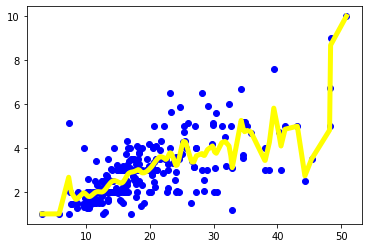

In [7]:
#main program
from math import ceil
import numpy as np
import pandas as pd
from scipy import linalg

def lowess(x, y, f, iterations):
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iterations):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],[np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return yest

import math
n = 100
data = pd.read_csv('tips.csv')
x = np.array(data.total_bill)
y = np.array(data.tip)
f =0.5
iterations=3
yest = lowess(x, y, f, iterations)
    
import matplotlib.pyplot as plt
plt.scatter(x, y, color='blue')
plt.plot(xsort[:, 1], ypred[X[:, 1].argsort(0)], color='yellow', linewidth=5)

In [13]:
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.io import push_notebook
def local_regression(x0, X, Y, tau):# add bias term
    x0 = np.r_[1, x0] # Add one to avoid the loss in information
    X = np.c_[np.ones(len(X)), X]
    xw = X.T * radial_kernel(x0, X, tau)
    beta = np.linalg.pinv(xw @ X) @ xw @ Y
    return x0 @ beta
def radial_kernel(x0, X, tau):
    return np.exp(np.sum((X -x0) ** 2, axis=1) / (-2 * tau * tau))
n = 1000
X = np.linspace(-3, 3, num=n)
print("The Data Set ( 10 Samples) X :\n",X[1:10])
Y = np.log(np.abs(X ** 2 -1) + .5)
print("The Fitting Curve Data Set (10 Samples) Y :\n",Y[1:10])
X += np.random.normal(scale=.1, size=n)
print("Normalised (10 Samples) X :\n",X[1:10])
domain = np.linspace(-3, 3, num=300)
print(" Xo Domain Space(10 Samples) :\n",domain[1:10])
def plot_lwr(tau):
    # prediction through regression
    prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
    plot = figure(plot_width=400, plot_height=400)
    plot.title.text='tau=%g' % tau
    plot.scatter(X, Y, alpha=.3)
    plot.line(domain, prediction, line_width=2, color='red')
    return plot
show(gridplot([[plot_lwr(10.), plot_lwr(1.)],[plot_lwr(0.1), plot_lwr(0.01)]]))


The Data Set ( 10 Samples) X :
 [-2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997 -2.96396396
 -2.95795796 -2.95195195 -2.94594595]
The Fitting Curve Data Set (10 Samples) Y :
 [2.13582188 2.13156806 2.12730467 2.12303166 2.11874898 2.11445659
 2.11015444 2.10584249 2.10152068]
Normalised (10 Samples) X :
 [-3.13805643 -2.93078917 -2.78462943 -3.20719979 -2.8944621  -2.87828048
 -2.88256094 -2.90319391 -2.98022494]
 Xo Domain Space(10 Samples) :
 [-2.97993311 -2.95986622 -2.93979933 -2.91973244 -2.89966555 -2.87959866
 -2.85953177 -2.83946488 -2.81939799]


In [10]:
!pip install bokeh

  Created wheel for bokeh: filename=bokeh-2.2.3-py3-none-any.whl size=9296319 sha256=0ddfc861e3526a1c6e3abb9b371bc720f80eb1fa4ca409fe079890b0ed3c23a4
  Stored in directory: c:\users\mohan\appdata\local\pip\cache\wheels\44\48\ac\5cde9e6d0b1e0afb4cff564eaf59462468abe37cfc83cbb5ed
Successfully built bokeh
